In [1]:
import pandas as pd

In [2]:
data = pd.read_json("../json/Guinness Pro14-2018-2019.json")

In [3]:
from rugby import *

In [4]:
pro14 = Tournament("Pro 14", "2018-2019", data)

[41, 0] [80]
[54, 0] [80]


In [43]:
pro14.teams()[7]

Glasgow

In [66]:
team = pro14.teams()[2]

In [67]:
players = team.squad(pro14)

In [68]:
print(team.name)
row = "{:20}\t{}\t{}\t{:.2f}"
print(row.format("Player", "Points", "Time",0 ))
print("-"*(7+len(row.format("Player", "Points", "Time", 0 ))))
for player in players:
    if player.total_play_time(pro14) == 0: continue
    print(row.format(player.name, player.total_on_field_points(pro14), player.total_play_time(pro14), player.total_on_field_points(pro14) / player.total_play_time(pro14)))

Ospreys
Player              	Points	Time	0.00
--------------------------------------------
Williams            	357	1620	0.22
Robert McCusker     	49	342	0.14
Will Jones          	18	73	0.25
Joe Thomas          	86	280	0.31
Ma'afu Fia          	103	338	0.30
Justin Tipuric      	333	998	0.33
Reuben Morgan-Williams	3	27	0.11
Olly Cracknell      	295	1291	0.23
Bradley Davies      	216	757	0.29
Nicky Smith         	241	664	0.36
Scott Baldwin       	213	901	0.24
Otten               	184	631	0.29
Hanno Dirkson       	196	916	0.21
Jordan Lay          	20	218	0.09
Will Griffiths      	0	24	0.00
Morgan Morris       	6	50	0.12
Ifan Phillips       	7	30	0.23
Sam Cross           	179	812	0.22
Owen Watkin         	330	953	0.35
Guido Volpi         	14	52	0.27
Tom Botha           	257	1157	0.22
Gheorghe Gajion     	0	36	0.00
Scott Williams      	120	443	0.27
James Ratti         	9	56	0.16
James King          	343	1417	0.24
Gareth Thomas       	68	315	0.22
Harri Morgan        	17	102	0.17
Rhodri Jones

In [53]:
total_times = {player.name: player.total_play_time(pro14) for player in pro14.players()}

In [54]:
total_Scores = {player.name: player.total_on_field_points(pro14) for player in pro14.players()}

In [55]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Relative frequency')

findfont: Font family ["'URW Bookman L'"] not found. Falling back to DejaVu Sans.


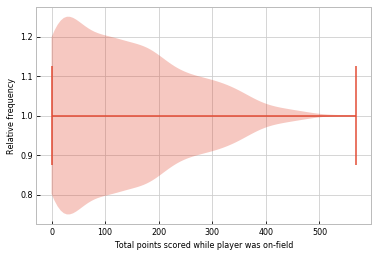

In [56]:
plt.violinplot(total_Scores.values(), vert=False);
plt.xlabel("Total points scored while player was on-field")
plt.ylabel("Relative frequency")

Text(0, 0.5, 'Relative frequency')

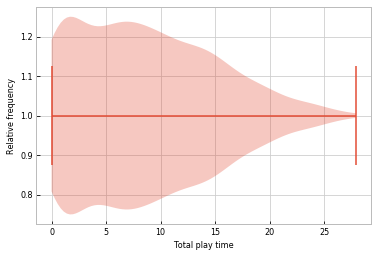

In [58]:
import numpy as np
plt.violinplot(np.array(list(total_times.values()))/60, vert=False);
plt.xlabel("Total play time")
plt.ylabel("Relative frequency")

#plt.annotate("Stuart Hogg", xy=(total_times['Stuart Hogg']/60, 1.1), rotation=45)
#plt.annotate("George Horne", xy=(total_times['George Horne']/60, 1.1), rotation=45)
#plt.annotate("Rob Harley", xy=(total_times['Robert Harley']/60, 1.1), rotation=45)

595

In [723]:
player = players[2]
for match in player.matches(pro14):
    position = [position for position in match.home.lineup if position.player == player]
    if len(position)==1:
        side = match.home
        
    else:
        position = [position for position in match.away.lineup if position.player == player]
        side = match.away
    position = position[0]
    print(sum([score.value for score in side.scores if (score.minute in position.playing) and (score.type is not "conversion")]))

50
34
32
30
8
7
28
14
52
25
27


In [692]:
players[2].positions(pro14)

[14	| Tommy Seymour,
 14	| Tommy Seymour,
 14	| Tommy Seymour,
 14	| Tommy Seymour,
 14	| Tommy Seymour,
 14	| Tommy Seymour,
 14	| Tommy Seymour,
 14	| Tommy Seymour,
 14	| Tommy Seymour,
 14	| Tommy Seymour,
 14	| Tommy Seymour]

In [687]:
players[2].positions(pro14)[1].playing

range(0, 62)

In [624]:
hornes = [x for x in players if ("Horne" in x.name)]
for player in players:
    total_score = sum([score.value for score in player.scores(pro14)])
    print(player, total_score)

Chris Fusaro 5
Stafford McDowall 10
Tommy Seymour 40
Robbie Nairn 10
Robert Harley 5
Kevin Bryce 0
Jamie Bhattie 0
Petrus Du Plessis 0
Stuart Hogg 15
George Turner 10
Sam Johnson 15
Callum Gibbins 20
Fraser Brown 10
Robbie Smith 0
Nick Grigg 20
Patrick Kelly 0
Matthew Smith 0
Rory Hughes 10
Kyle Steyn 10
Scott Cummings 5
Ryan Wilson 5
Oli Kebble 5
Kiren McDonald 0
Ratu Tagive 0
Alex Dunbar 5
George Horne 72
Siua Halanukonuka 0
Ali Price 25
Brandon Thomson 57
Greg Peterson 5
Alex Allen 0
Ruaridh Jackson 5
Peter Horne 96
Huw Jones 20
Nick Frisby 5
Van der Merwe 0
Tim Swinson 10
David Tameilau 5
Lee Jones 20
Zander Fagerson 25
Adam Hastings 131
Nikola Matawalu 30
Matt Fagerson 30
Thomas Gordon 0
Adam Nicol 0
Adam Ashe 17
D'Arcy Rae 0
Grant Stewart 10
Bruce Flockhart 0
Johnny Gray 0
Andrew Davidson 0


In [638]:
players[0].positions(pro14)[0].on_times

[0]

In [637]:
players[0].positions(pro14)[3].off_times

[]

In [632]:
if len(players[0].positions(pro14)[0].off_times)

0

In [641]:
for position in players[0].positions(pro14):
    if len(position.on_times) > 0:
        if len(position.off_times) == 0:
            position.off_times.append(80)
    for i, on_times in enumerate(position.on_times):
        position.playing = range(position.on_times[i], position.off_times[i])

In [643]:
players[0].positions(pro14)[0].playing

range(0, 80)